## Homework

> Note: sometimes your answer doesn't match one of
> the options exactly. That's fine.
> Select the option that's closest to your solution.


In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

You can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
unzip bank+marketing.zip
unzip bank.zip
```

We need `bank-full.csv`.

In this dataset the target variable is `y` variable - has the client subscribed a term deposit or not.

In [65]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-14 05:05:03--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip.2’

bank+marketing.zip.     [   <=>              ] 999.85K  2.38MB/s    in 0.4s    

2024-10-14 05:05:03 (2.38 MB/s) - ‘bank+marketing.zip.2’ saved [1023843]



In [66]:
!unzip -o "bank+marketing.zip"
!unzip -o "bank.zip"

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


### Dataset preparation

For the rest of the homework, you'll need to use only these columns:

* `'age'`,
* `'job'`,
* `'marital'`,
* `'education'`,
* `'balance'`,
* `'housing'`,
* `'contact'`,
* `'day'`,
* `'month'`,
* `'duration'`,
* `'campaign'`,
* `'pdays'`,
* `'previous'`,
* `'poutcome'`,
* `'y'`



Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [67]:
import pandas as pd
import numpy as np

In [68]:
df = pd.read_csv('bank-full.csv', sep=";")

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [70]:
NUMERICAL_COLUMNS = [
    'age',
    'balance',
    'day',
    'duration',
    'campaign',
    'pdays',
    'previous',
]

CATEGORICAL_COLUMNS = [
    'job',
    'marital',
    'education',
    'housing',
    'contact',
    'month',
    'poutcome',
]

USEFUL_COLUMNS = NUMERICAL_COLUMNS + CATEGORICAL_COLUMNS

TARGET_COLUMN = 'y'

df = df[USEFUL_COLUMNS + [TARGET_COLUMN]]
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [71]:
df.head(5)

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,housing,contact,month,poutcome,y
0,58,2143,5,261,1,-1,0,management,married,tertiary,yes,unknown,may,unknown,0
1,44,29,5,151,1,-1,0,technician,single,secondary,yes,unknown,may,unknown,0
2,33,2,5,76,1,-1,0,entrepreneur,married,secondary,yes,unknown,may,unknown,0
3,47,1506,5,92,1,-1,0,blue-collar,married,unknown,yes,unknown,may,unknown,0
4,33,1,5,198,1,-1,0,unknown,single,unknown,no,unknown,may,unknown,0


In [72]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_test.reset_index(drop=True, inplace=True)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

y_train = df_train[TARGET_COLUMN]
y_val = df_val[TARGET_COLUMN]
y_test = df_test[TARGET_COLUMN]

del df_train[TARGET_COLUMN]
del df_val[TARGET_COLUMN]
del df_test[TARGET_COLUMN]

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the `y` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- **`duration`** (answer)
- `previous`

In [73]:
from sklearn.metrics import roc_auc_score


In [74]:
AUC_DICTIONARY = {}

for item in NUMERICAL_COLUMNS:
    print(item)

    score = roc_auc_score(y_train, df_train[item])
    AUC_DICTIONARY[item] = score

    if score < 0.5:
        df_train[item] = -df_train[item]

age
balance
day
duration
campaign
pdays
previous


In [75]:
import json

print(json.dumps(AUC_DICTIONARY, indent=4, sort_keys=True))

{
    "age": 0.48781428247265596,
    "balance": 0.5888313805382317,
    "campaign": 0.42854569843178414,
    "day": 0.474042117616092,
    "duration": 0.8147002759670778,
    "pdays": 0.5901276247352144,
    "previous": 0.5985653242764153
}


In [76]:
def max_value_dict(dictionary):
    max_value = float('-inf')
    max_key = None
    for key, value in dictionary.items():
        if value > max_value:
            max_value = value
            max_key = key
    return max_key

print(max_value_dict(AUC_DCTIONARY))

duration


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- **0.89** (answer)
- 0.99

In [77]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [78]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[CATEGORICAL_COLUMNS + NUMERICAL_COLUMNS].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [79]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [80]:
val_dict = df_val[CATEGORICAL_COLUMNS + NUMERICAL_COLUMNS].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

In [81]:
roc_auc_value = roc_auc_score(y_val, y_pred)
roc_auc_value

0.8917653538338497

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* **0.265** (answer)
* 0.465
* 0.665
* 0.865

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
th_vector = np.arange(0.0, 1.00, 0.01)
presition_vector = np.empty_like(th_vector)
recall_vector = np.empty_like(th_vector)
accuracy_vector = np.empty_like(th_vector)

true_positive_vector = np.empty_like(th_vector, dtype=np.uint16)
false_positive_vector = np.empty_like(th_vector, dtype=np.uint16)
true_negative_vector = np.empty_like(th_vector, dtype=np.uint16)
false_negative_vector = np.empty_like(th_vector, dtype=np.uint16)

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for i, th in enumerate(th_vector):
    # get accuracy
    # score = accuracy_score(y_val, y_pred >= th)
    # accuracy_vector[i] = score

    predict_positive = (y_pred >= th)
    predict_negative = (y_pred < th)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    true_positive_vector[i] = tp
    false_positive_vector[i] = fp
    true_negative_vector[i] = tn
    false_negative_vector[i] = fn

    presition_vector[i] = tp / (tp + fp)
    recall_vector[i] = tp / (tp + fn)


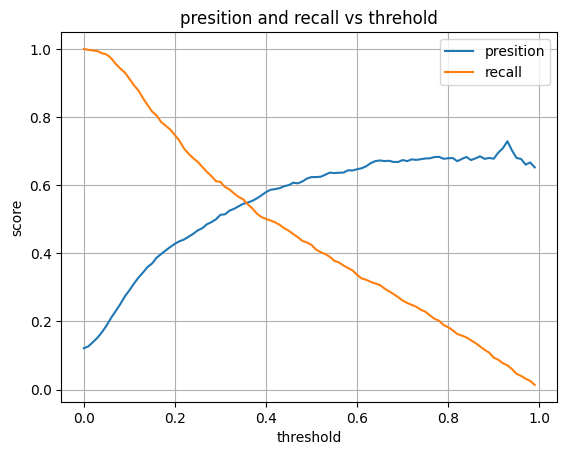

In [84]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(th_vector, presition_vector, label='presition')
plt.plot(th_vector, recall_vector, label='recall')
plt.xlabel('threshold')
plt.ylabel('score')
plt.title('presition and recall vs threhold')
plt.grid(True)
plt.legend()
plt.show()

In [85]:
abs_diff_pr_recall = np.abs(presition_vector - recall_vector)
min_index = abs_diff_pr_recall.argmin()
th_vector[min_index]


0.36

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- **0.22** (answer)
- 0.42
- 0.62

In [86]:
f1_vector = np.empty_like(th_vector)

for i, th in enumerate(th_vector):
    f1_vector[i] = 2 * presition_vector[i] * recall_vector[i] / (presition_vector[i] + recall_vector[i])

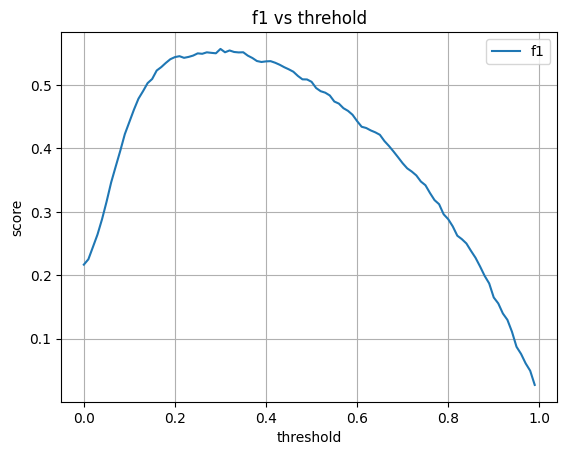

In [87]:
plt.figure()
plt.plot(th_vector, f1_vector, label='f1')
plt.xlabel('threshold')
plt.ylabel('score')
plt.title('f1 vs threhold')
plt.grid(True)
plt.legend()
plt.show()

In [88]:
arg_max_f1 = np.argmax(f1_vector)

print("th_vector[arg_max_f1]:", th_vector[arg_max_f1])
print("f1_vector[arg_max_f1]:", f1_vector[arg_max_f1])

th_vector[arg_max_f1]: 0.3
f1_vector[arg_max_f1]: 0.5570358034970857


### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- **0.006** (answer)
- 0.06
- 0.26

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores_vector = np.empty(5)
count_iterations = 0

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train[TARGET_COLUMN]
    y_val = df_val[TARGET_COLUMN]

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[CATEGORICAL_COLUMNS + NUMERICAL_COLUMNS].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    val_dict = df_val[CATEGORICAL_COLUMNS + NUMERICAL_COLUMNS].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict_proba(X_val)

    roc_auc_value = roc_auc_score(y_val, y_pred[:, 1])
    auc_scores_vector[count_iterations] = roc_auc_value
    count_iterations += 1

    print(f"for iteration {count_iterations} roc_auc_value: {roc_auc_value}")

std_dev = auc_scores_vector.std()
print(f"std_dev: {std_dev}")


for iteration 1 roc_auc_value: 0.8992842405563055
for iteration 2 roc_auc_value: 0.8990110164487815
for iteration 3 roc_auc_value: 0.9111641244449282


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- **1** (answer)

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [ ]:
C_vector = [0.000001, 0.001, 1]
len_c_vector = len(C_vector)

N_SPLIT = 5
kfold = KFold(n_splits=N_SPLIT, shuffle=True, random_state=1)

auc_scores_matrix = np.empty((len_c_vector, N_SPLIT))

for i, c_value in enumerate(C_vector):

    count_iterations = 0

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train[TARGET_COLUMN]
        y_val = df_val[TARGET_COLUMN]

        dv = DictVectorizer(sparse=False)
        train_dict = df_train[CATEGORICAL_COLUMNS + NUMERICAL_COLUMNS].to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)

        model = LogisticRegression(solver='liblinear', C=c_value, max_iter=1000)
        model.fit(X_train, y_train)

        val_dict = df_val[CATEGORICAL_COLUMNS + NUMERICAL_COLUMNS].to_dict(orient='records')
        X_val = dv.transform(val_dict)
        y_pred = model.predict_proba(X_val)

        roc_auc_value = roc_auc_score(y_val, y_pred[:, 1])
        auc_scores_matrix[i, count_iterations] = roc_auc_value
        count_iterations += 1

        print(f"for c value {c_value} for iteration {count_iterations} roc_auc_value: {roc_auc_value}")

    print()



In [ ]:
std_values = auc_scores_matrix.std(axis=1)
argmin_std_index = std_values.argmin()

C_min = C_vector[argmin_std_index]
print(f"C_min: {C_min}")
print(f"std min: {std_values[argmin_std_index]}")

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw04
* If your answer doesn't match options exactly, select the closest one